<a href="https://colab.research.google.com/github/nickgithubaccaunt/neural_networks/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN)_%D0%A0%D0%BE%D0%B3%D0%B0%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


## 1.3. Визуализируем часть данных из датасета

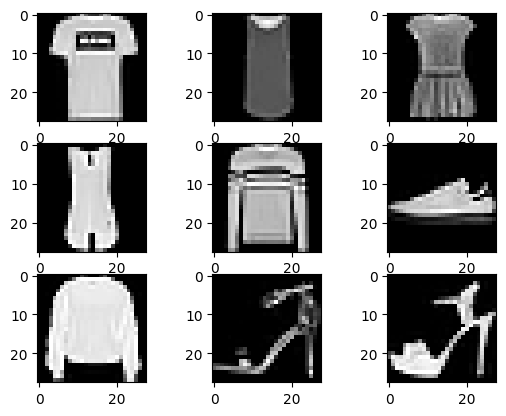

In [3]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [4]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# Нормализация данных
trainX, testX = trainX / 255.0, testX / 255.0

# Создание модели
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Вывод структуры модели
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 1.5. Обучаем модель

In [5]:
history = model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7759 - loss: 0.6234 - val_accuracy: 0.8697 - val_loss: 0.3633
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8870 - loss: 0.3082 - val_accuracy: 0.8778 - val_loss: 0.3199
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9071 - loss: 0.2534 - val_accuracy: 0.9002 - val_loss: 0.2712
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9196 - loss: 0.2212 - val_accuracy: 0.9093 - val_loss: 0.2551
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9247 - loss: 0.1971 - val_accuracy: 0.9097 - val_loss: 0.2542
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9346 - loss: 0.1754 - val_accuracy: 0.9113 - val_loss: 0.2532
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9446 - loss: 0.1516 - val_accuracy: 0.9069 - val_loss: 0.2753
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9502 - loss: 0.132

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

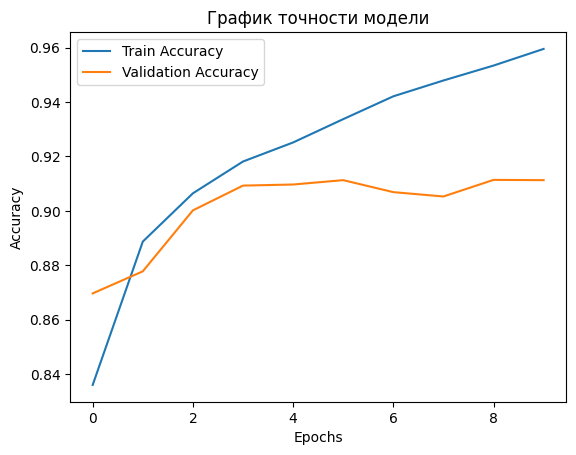

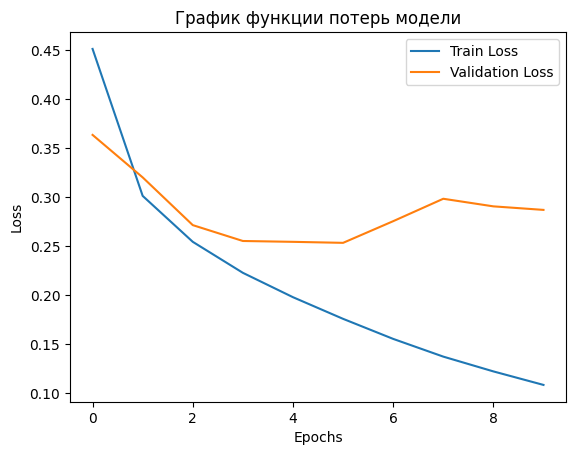

In [6]:
# Построение графика точности на обучающей и валидационной выборках
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('График точности модели')
plt.show()

# Построение графика функции потерь на обучающей и валидационной выборках
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('График функции потерь модели')
plt.show()


## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


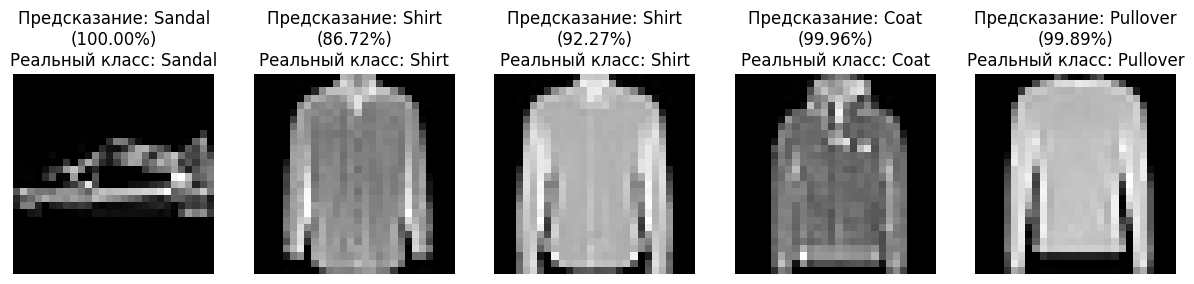

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import random

random_indices = random.sample(range(testX.shape[0]), 5)
sample_images = testX[random_indices]
sample_labels = testy[random_indices]

predictions = model.predict(sample_images)

plt.figure(figsize=(15, 5))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    confidence = np.max(predictions[i]) * 100

    actual_label = sample_labels[i]
    plt.title(f"Предсказание: {class_names[predicted_label]}\n({confidence:.2f}%)\nРеальный класс: {class_names[actual_label]}")
    plt.axis('off')

plt.show()

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
import numpy as np
import os

In [36]:
zip_path = "/content/archive.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Файлы разархивированы в: {extract_path}")
print(os.listdir(extract_path))


Файлы разархивированы в: /content/dataset
['flower_images']


In [38]:
data_dir = '/content/dataset/flower_images'

img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Генератор обучающих данных
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Генератор валидационных данных
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_generator.class_indices)
print(f"Количество классов: {num_classes}")

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Количество классов: 5


In [39]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(64, (5,5), padding='same', activation='relu'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(128, (5,5), padding='same', activation='relu'),
    AveragePooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(240, activation='relu'),
    Dense(120, activation='relu'),
    Dense(60, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 32, 32, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 16, 16, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 8, 8, 128)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 240)                 │       1,966,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │          28,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 60)                  │           7,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │             305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,893 (8.62 MB)

 Trainable params: 2,259,893 (8.62 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(
    optimizer=Adamax(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=100
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.3584 - loss: 1.4610 - val_accuracy: 0.4920 - val_loss: 1.2706
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.5053 - loss: 1.2052 - val_accuracy: 0.5190 - val_loss: 1.1373
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.5467 - loss: 1.1256 - val_accuracy: 0.5540 - val_loss: 1.0902
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.5847 - loss: 1.0353 - val_accuracy: 0.6240 - val_loss: 0.9829
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.5993 - loss: 0.9847 - val_accuracy: 0.5940 - val_loss: 1.0026
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.6121 - loss: 0.9567 - val_accuracy: 0.6350 - val_loss: 0.9367
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.6553 - loss: 0.8643 - val_accuracy: 0.6830 - val_loss: 0.8525
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.6872 - loss: 0.7987 - val

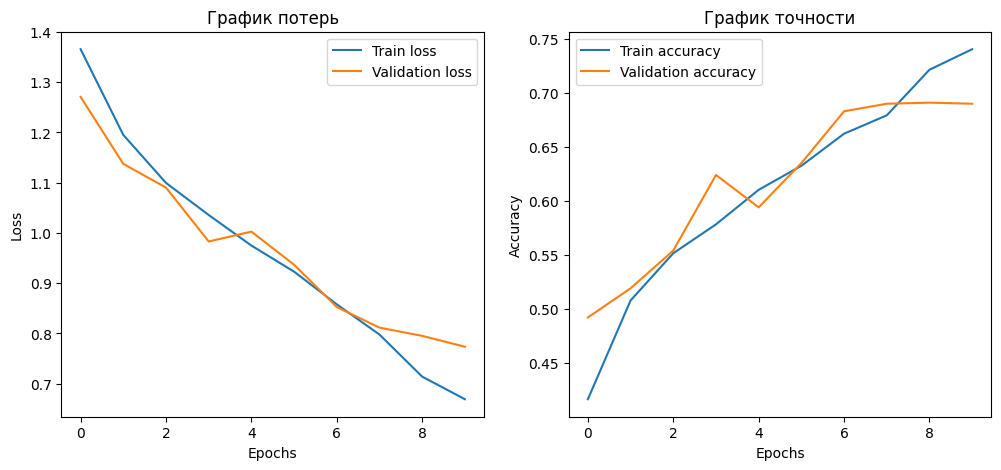

In [41]:
# Графики обучения
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('График потерь')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('График точности')
plt.legend()

plt.show()

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

Была взята VGG16. Архитектура была отсюда взятя - https://habr.com/ru/companies/skillfactory/articles/545384/

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt

In [43]:
model = Sequential()

# Блок 1 (16 фильтров)
model.add(Conv2D(16, (3,3), padding='same', activation='elu', input_shape=(64, 64, 3)))
model.add(Conv2D(16, (3,3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Блок 2 (32 фильтра)
model.add(Conv2D(32, (3,3), padding='same', activation='elu'))
model.add(Conv2D(32, (3,3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

# Блок 3 (64 фильтра)
model.add(Conv2D(64, (3,3), padding='same', activation='elu'))
model.add(Conv2D(64, (3,3), padding='same', activation='elu'))
model.add(Conv2D(64, (3,3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

# Блок 4 (128 фильтров)
model.add(Conv2D(128, (3,3), padding='same', activation='elu'))
model.add(Conv2D(128, (3,3), padding='same', activation='elu'))
model.add(Conv2D(128, (3,3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

# Блок 5 (128 фильтров)
model.add(Conv2D(128, (3,3), padding='same', activation='elu'))
model.add(Conv2D(128, (3,3), padding='same', activation='elu'))
model.add(Conv2D(128, (3,3), padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.10))

# Полносвязные слои
model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.25))

# Выходной слой
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,257,685 (4.80 MB)

 Trainable params: 1,257,685 (4.80 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    optimizer=Adamax(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=100
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.2889 - loss: 1.5977 - val_accuracy: 0.4450 - val_loss: 1.3223
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.4693 - loss: 1.2495 - val_accuracy: 0.5650 - val_loss: 1.1182
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.5341 - loss: 1.1470 - val_accuracy: 0.5100 - val_loss: 1.2059
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.5686 - loss: 1.0918 - val_accuracy: 0.6010 - val_loss: 0.9623
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 109ms/step - accuracy: 0.6398 - loss: 0.9354 - val_accuracy: 0.6310 - val_loss: 0.9284
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 108ms/step - accuracy: 0.6800 - loss: 0.8384 - val_accuracy: 0.7090 - val_loss: 0.7685
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.7273 - loss: 0.7164 - val_accuracy: 0.7260 - val_loss: 0.7218
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.7897 - loss: 0

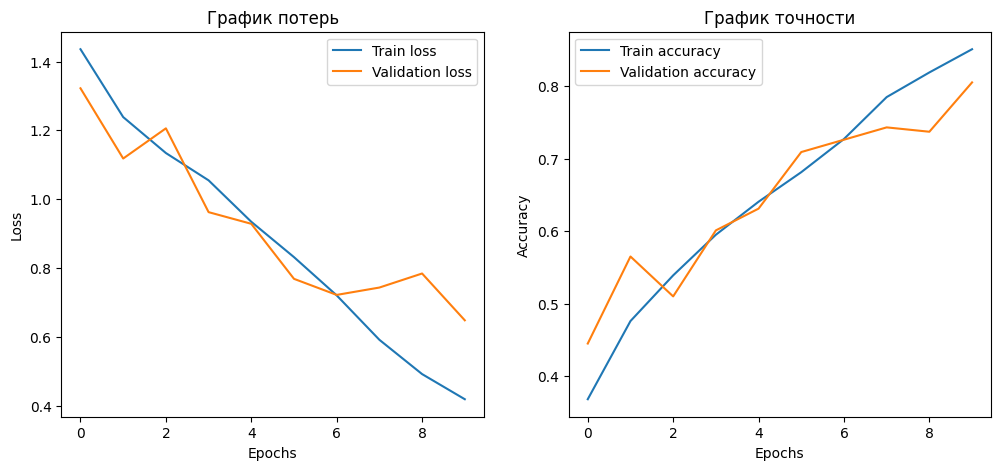

In [45]:
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('График потерь')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('График точности')
plt.legend()

plt.show()

## 2.3. Сохраните полученные модели

In [48]:
from tensorflow.keras.models import load_model
from google.colab import files
import shutil

model.save('/content/base_cnn_model.keras')
model.export('/content/base_cnn_model_savedmodel')

model.save('/content/vgg_like_model.keras')
model.export('/content/vgg_like_model_savedmodel')

print("✅ Обе модели сохранены!")

base_cnn_model = load_model('/content/base_cnn_model.keras')
vgg_like_model = load_model('/content/vgg_like_model.keras')

print("✅ Обе модели загружены успешно!")

Saved artifact at '/content/base_cnn_model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_42')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  140349142139344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349142150864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145877776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145889680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145887568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145886992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145876048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145888912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145890256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140349145889488: TensorSpec(shape=(), dtype=tf.resource, name=Non

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 36 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Обе модели загружены успешно!


## 2.4. Загрузите обученную модель из прошлой практической работы


In [4]:
import h5py

try:
    with h5py.File('/content/best_model.h5', 'r') as f:
        print("Файл открылся успешно!")
except Exception as e:
    print(f"Ошибка при открытии файла: {e}")


Файл открылся успешно!



## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 36 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Base CNN Model Accuracy: 46.67%
VGG-Like Model Accuracy: 46.67%
Best Model Accuracy: 13.33%


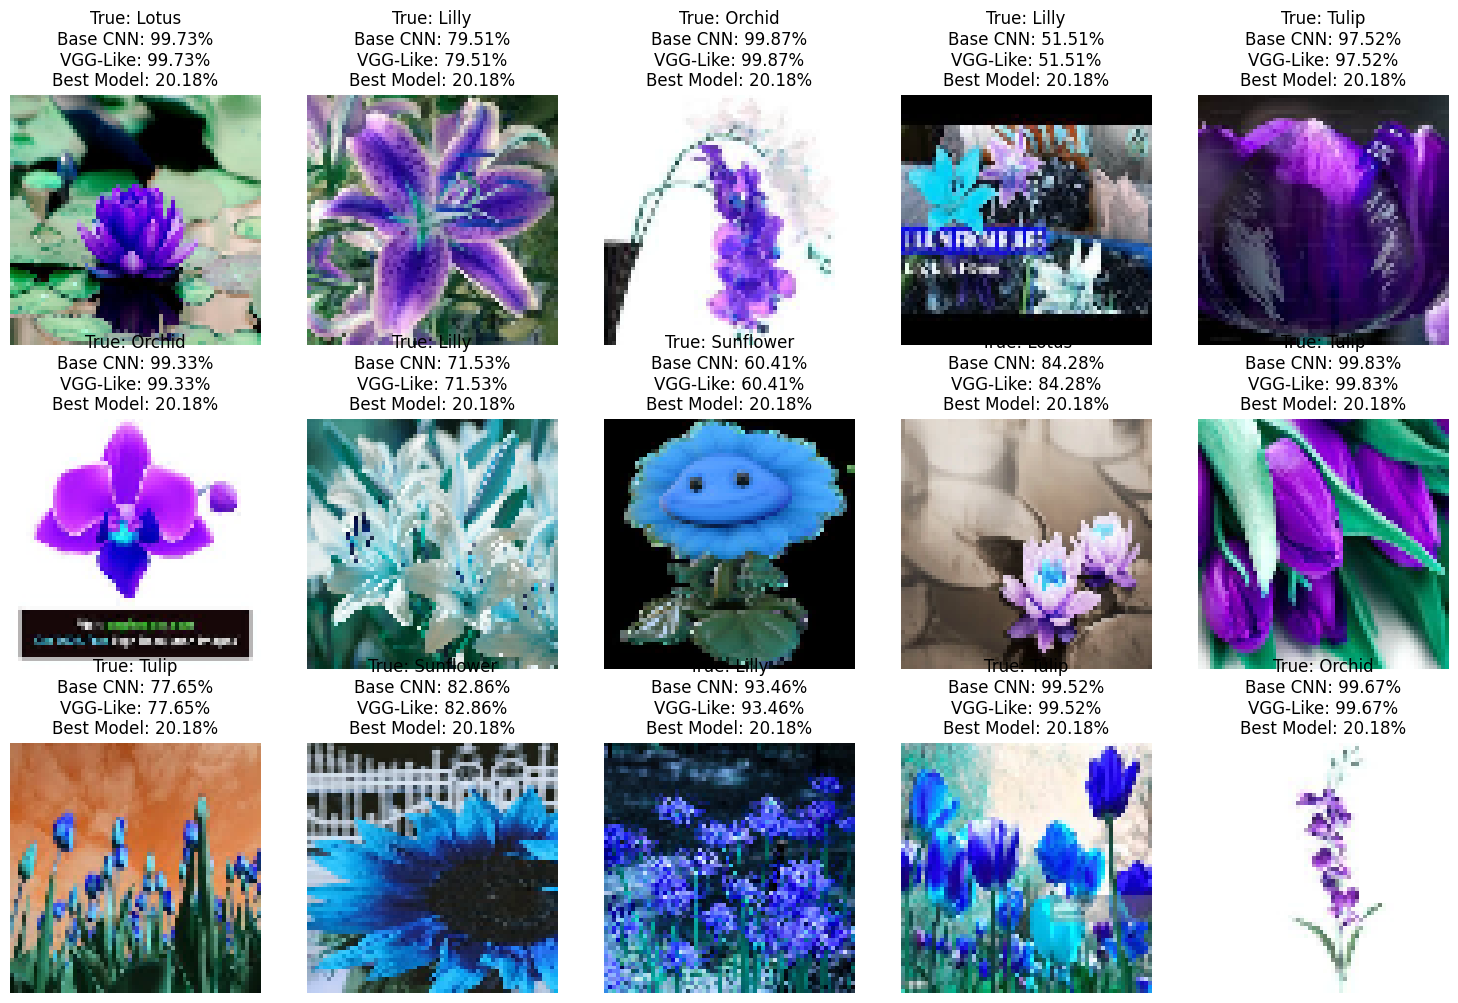

In [4]:
import numpy as np
import random
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
from imutils import paths

base_cnn_model_path = '/content/base_cnn_model.keras'
vgg_like_model_path = '/content/vgg_like_model.keras'
best_model_path = '/content/best_model.keras'

base_cnn_model = load_model(base_cnn_model_path)
vgg_like_model = load_model(vgg_like_model_path)
best_model = load_model(best_model_path)

dataset_path = '/content/dataset/flower_images'

image_paths = list(paths.list_images(dataset_path))
random.shuffle(image_paths)
sample_image_paths = image_paths[:15]

def load_and_preprocess_images(image_paths, target_size):
    data = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Ошибка загрузки: {img_path}")
            continue
        img = cv2.resize(img, target_size).astype("float32") / 255.0
        data.append(img)
    return np.array(data)

# Подготовка изображений для разных моделей с учетом их размеров
# Для Base CNN и VGG-Like модели используем размер 64x64
X_base_cnn_vgg = load_and_preprocess_images(sample_image_paths, (64, 64))

# Для Best модели используем размер 128x128
X_best_model = load_and_preprocess_images(sample_image_paths, (128, 128))

# Кодируем метки
labels = [path.split(os.path.sep)[-2] for path in sample_image_paths]
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Функция для предсказания с использованием модели
def get_predictions(model, images):
    return np.argmax(model.predict(images), axis=1)

# Получаем предсказания для всех моделей
base_cnn_preds = get_predictions(base_cnn_model, X_base_cnn_vgg)
vgg_like_preds = get_predictions(vgg_like_model, X_base_cnn_vgg)
best_model_preds = get_predictions(best_model, X_best_model)

# Получаем вероятности предсказаний для вывода процентов
base_cnn_probs = base_cnn_model.predict(X_base_cnn_vgg)
vgg_like_probs = vgg_like_model.predict(X_base_cnn_vgg)
best_model_probs = best_model.predict(X_best_model)

# Рассчитываем точность для каждой модели
base_cnn_accuracy = accuracy_score(encoded_labels, base_cnn_preds)
vgg_like_accuracy = accuracy_score(encoded_labels, vgg_like_preds)
best_model_accuracy = accuracy_score(encoded_labels, best_model_preds)

# Выводим точность моделей
print(f"Base CNN Model Accuracy: {base_cnn_accuracy * 100:.2f}%")
print(f"VGG-Like Model Accuracy: {vgg_like_accuracy * 100:.2f}%")
print(f"Best Model Accuracy: {best_model_accuracy * 100:.2f}%")

# Выводим примеры предсказаний и изображений
sample_indices = range(len(sample_image_paths))

plt.figure(figsize=(15, 10))

for i, idx in enumerate(sample_indices):
    img = X_base_cnn_vgg[idx]  # Используем те же изображения для Base CNN и VGG-Like
    plt.subplot(3, 5, i + 1)
    plt.imshow(img)

    # Извлекаем предсказания в процентах
    base_cnn_percentage = base_cnn_probs[idx][base_cnn_preds[idx]] * 100
    vgg_like_percentage = vgg_like_probs[idx][vgg_like_preds[idx]] * 100
    best_model_percentage = best_model_probs[idx][best_model_preds[idx]] * 100

    # Показать проценты на изображении
    plt.title(f"True: {labels[idx]}\n"
              f"Base CNN: {base_cnn_percentage:.2f}%\n"
              f"VGG-Like: {vgg_like_percentage:.2f}%\n"
              f"Best Model: {best_model_percentage:.2f}%")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [20]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [21]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [22]:
train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. Отрисуйте несколько примеров

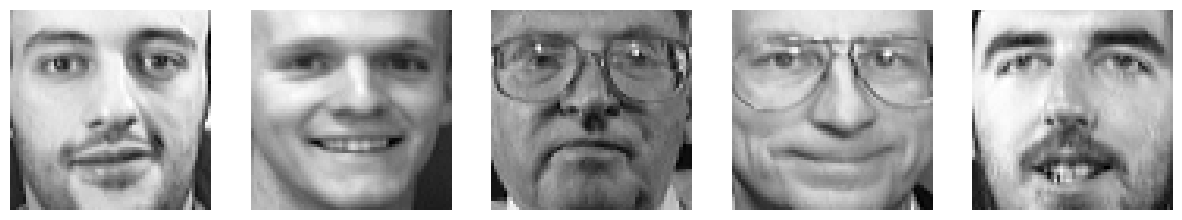

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [24]:
n_pixels = train.shape[1]

X_train = train[:, :(n_pixels + 1) // 2, :]
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [25]:
X_train.shape

(320, 32, 64)

Вот один пример обучающей пары.

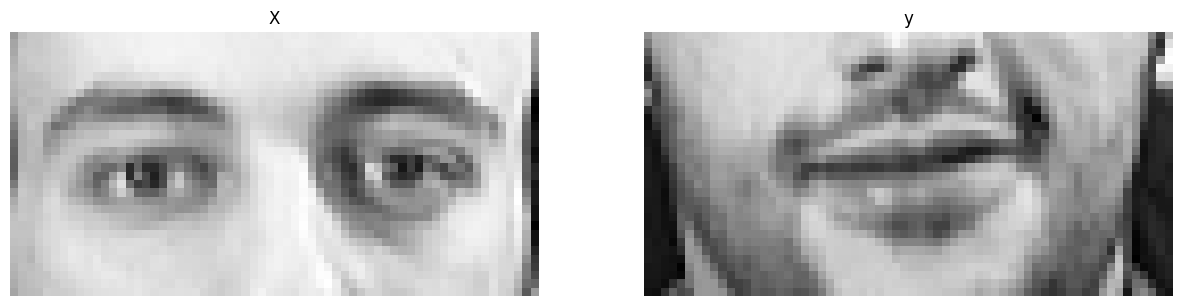

In [26]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [27]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 16, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 16, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 4, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2048)                │       2,099,200 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,188,992 (27.42 MB)

 Trainable params: 7,188,992 (27.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [31]:
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

# Fit the model
EPOCH = 100

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.0000e+00 - loss: 0.0269 - val_accuracy: 0.0000e+00 - val_loss: 0.0222
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 0.0207 - val_accuracy: 0.0312 - val_loss: 0.0215
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0176 - loss: 0.0209 - val_accuracy: 0.0156 - val_loss: 0.0215
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0125 - loss: 0.0210 - val_accuracy: 0.0156 - val_loss: 0.0217
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0090 - loss: 0.0213 - val_accuracy: 0.0156 - val_loss: 0.0214
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 267ms/step - accuracy: 0.0070 - loss: 0.0199 - val_accuracy: 0.0000e+00 - val_loss: 0.0211
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0035 - loss: 0.0198 - val_accuracy: 0.0156 - val_loss: 0.0207
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.0078 - loss: 0.0194 - val_accuracy:

## 3.5. Сделайте предсказания на тестовых данных

In [36]:
preds = model_rec.predict(X_test, batch_size=10)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


## 3.6. Посчитайте метрику качества на тестовых данных

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

0.009043827652931213

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [38]:

preds.shape

(80, 2048)

In [39]:
pred_test = preds.reshape(preds.shape[0], 32, 64)

Отрисуйте все предсказания.

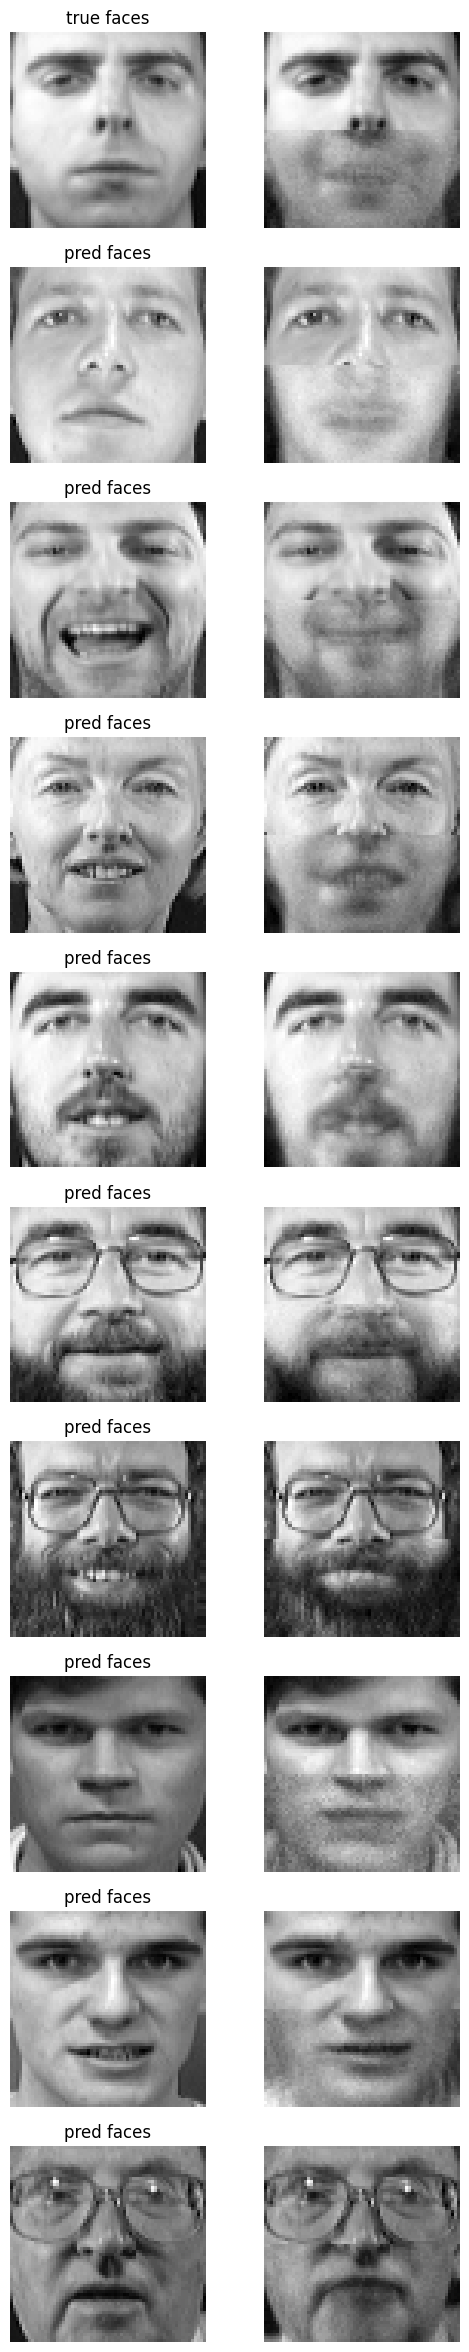

In [40]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )
